In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
dataset = pd.read_csv('hour.csv')

In [43]:
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24000,0.28790,0.81000,0.00000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22000,0.27270,0.80000,0.00000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22000,0.27270,0.80000,0.00000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24000,0.28790,0.75000,0.00000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24000,0.28790,0.75000,0.00000,0,1,1


In [44]:
# dataset.info()

In [79]:
# maybe change all 4 values to 3
dataset.weathersit.value_counts()

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

In [46]:
# pd.set_option('display.float_format', lambda x: '%.5f' % x)
# dataset.describe()

In [72]:
# just checking the iris dataset from the examples
iris = pd.read_csv('iris.csv')
iris.head()


,Sepal Length,Sepal Width,Petal Length,Petal Width,Type
0,5.10000,3.50000,1.40000,0.20000,Iris-setosa
1,4.90000,3.00000,1.40000,0.20000,Iris-setosa
2,4.70000,3.20000,1.30000,0.20000,Iris-setosa
3,4.60000,3.10000,1.50000,0.20000,Iris-setosa
4,5.00000,3.60000,1.40000,0.20000,Iris-setosa


In [49]:
# steps to put stuff in np array as in the exercises
X = dataset.values
N, M = X.shape
attributeNames = dataset.columns.tolist()

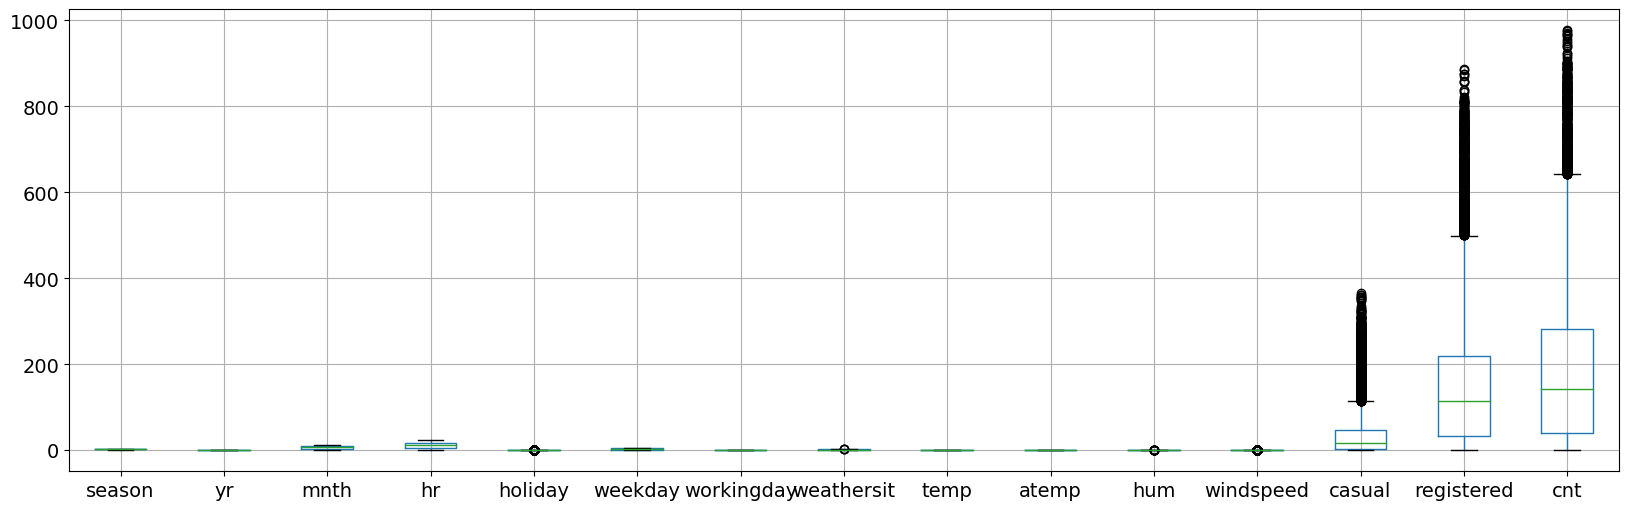

In [80]:
# check outliers

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.figure(figsize=(20,6))

columns_wo_instant = dataset.columns[1:]
dataset[columns_wo_instant].boxplot(widths=0.5)
plt.show()

In [74]:

# check for normal distribution

In [75]:
# check for correlation

In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


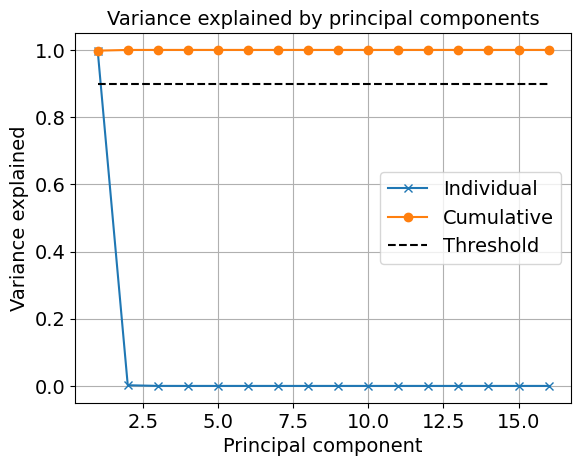

In [77]:
df_int = dataset.copy().drop('dteday', axis=1)

X = df_int.values

from scipy.linalg import svd

# Subtract mean value from data
Y = X - np.ones((N,1))*X.mean(axis=0)

# PCA by computing SVD of Y
U,S,V = svd(Y,full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()
